# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import numpy and pandas
import numpy as np
import pandas as pd


# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:
sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [3]:
# Your code here:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [4]:
# Your code here:
sensor.isnull().sum()

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [5]:
# Your code here:
print(f'rows:{sensor.shape[0]} columns: {sensor.shape[1]}')

rows:1751 columns: 12


To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [6]:
# Your code here:
date = pd.date_range(start='01/01/2018 00:00:00', end='01/01/2018 00:29:10', periods=sensor.shape[0])

Assign the time series index to the dataframe's index.

In [7]:
# Your code here:
sensor.index = pd.DatetimeIndex(date, freq=pd.infer_freq(date))
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until


Figure(432x288)


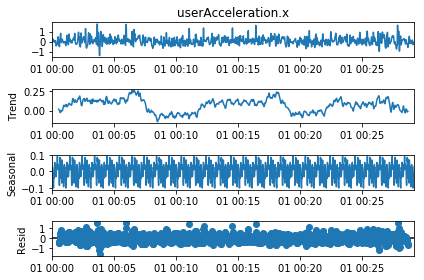

In [8]:
# Your code here:
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(sensor['userAcceleration.x'], freq=60)
print(res.plot())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


Figure(432x288)


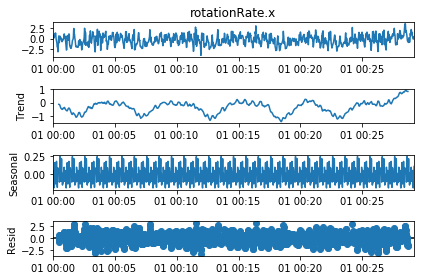

In [9]:
res = sm.tsa.seasonal_decompose(sensor['rotationRate.x'], freq=60)
print(res.plot())

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

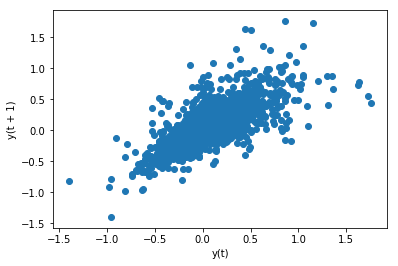

In [10]:
# Your code here:
pd.plotting.lag_plot(sensor["userAcceleration.x"])

Create a lag plot for `rotationRate.x`

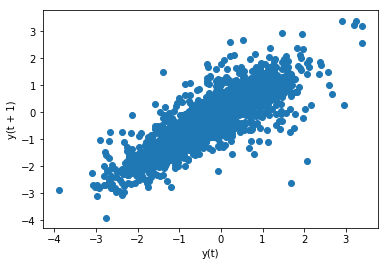

In [11]:
# Your code here:
pd.plotting.lag_plot(sensor["rotationRate.x"])

What are your conclusions from both visualizations?

In [12]:
# Your conclusions here:
print('There is a relation between the points and time t and time t+1')

There is a relation between the points and time t and time t+1


The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [13]:
# Your code here:
from statsmodels.tsa.stattools import adfuller
print([(col,adfuller(sensor[col])[1]) for col in ['rotationRate.x',"userAcceleration.x"]])


[('rotationRate.x', 6.320230335912249e-06), ('userAcceleration.x', 2.823439483037563e-30)]


What are your conclusions from this test?

In [14]:
# Your conclusions here:
stationaryCheck = lambda X: "Not-Stationary" if adfuller(X)[1] > 0.05 else "Stationary"
print([(col,stationaryCheck(sensor[col])) for col in ['rotationRate.x',"userAcceleration.x"]])
print('Therefore, our data do not depend on time, as we thought before.')

[('rotationRate.x', 'Stationary'), ('userAcceleration.x', 'Stationary')]
Therefore, our data do not depend on time, as we thought before.


Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [15]:
# Your code here:
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
predictions = dict()
realidad = sensor['userAcceleration.x'][:-10]
futuro = sensor['userAcceleration.x'][-10:]
# Entrena el modelo AR
model = ARMA(realidad, order=(2, 1))
model_fit = model.fit(maxiter=10)

# Predice los valores AR
predictions['realidad']= futuro
predictions['prediccion']= model_fit.predict(start=len(realidad),end=len(realidad)+len(futuro)-1, dynamic=False)
pred = pd.DataFrame(predictions)
pred

,realidad,prediccion
2018-01-01 00:29:01,0.149749,0.173148
2018-01-01 00:29:02,0.038461,0.142896
2018-01-01 00:29:03,-0.169175,0.100522
2018-01-01 00:29:04,-0.300361,0.070106
2018-01-01 00:29:05,-0.270174,0.056099
2018-01-01 00:29:06,-0.268367,0.053778
2018-01-01 00:29:07,-0.102444,0.056790
2018-01-01 00:29:08,-0.085590,0.060646
2018-01-01 00:29:09,-0.048105,0.063316
2018-01-01 00:29:10,-0.065011,0.064493


To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [16]:
# Your code here:
from statsmodels.tools.eval_measures import rmse
rmse(predictions['realidad'], predictions['prediccion'], axis=0)

0.22529863649048862

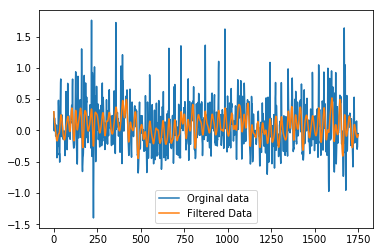

In [17]:
from scipy import signal
import matplotlib.pyplot as plt

data = sensor['userAcceleration.x']

b, a = signal.butter(3, 1/10)
data_filtered = signal.filtfilt(b, a, data)
plt.plot(data.to_numpy())
plt.plot(data_filtered)
plt.legend(["Orginal data","Filtered Data"])

In [18]:
df_filtered = pd.DataFrame(data_filtered, index=pd.date_range(start='01/01/2018 00:00:00', end='01/01/2018 00:29:10', periods=sensor.shape[0])).rename(columns={0:'userAcceleration.x'})
df_filtered 

,userAcceleration.x
2018-01-01 00:00:00,0.298225
2018-01-01 00:00:01,0.258928
2018-01-01 00:00:02,0.221158
2018-01-01 00:00:03,0.185751
2018-01-01 00:00:04,0.153126
...,...
2018-01-01 00:29:06,-0.111187
2018-01-01 00:29:07,-0.105193
2018-01-01 00:29:08,-0.095507
2018-01-01 00:29:09,-0.082934


In [19]:
realidad = df_filtered['userAcceleration.x'][:-10]
futuro = df_filtered['userAcceleration.x'][-10:]
# Entrena el modelo AR
model = ARMA(realidad, order=(2, 0))
model_fit = model.fit(maxiter=10)
# Predice los valores AR
predictions['prediccionLF']= model_fit.predict(start=len(realidad),end=len(realidad)+len(futuro)-1, dynamic=False)
pred = pd.DataFrame(predictions)
rmse(predictions['realidad'], predictions['prediccionLF'], axis=0)

/home/elisa/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  % freq, ValueWarning)
/home/elisa/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0.15942640374560554

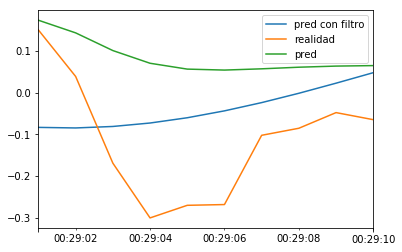

In [20]:
predictions["prediccionLF"].plot()
predictions['realidad'].plot()
predictions["prediccion"].plot()
plt.legend(["pred con filtro","realidad","pred"])